In [1]:
import pandas as pd
base = pd.read_csv('census.csv')
base.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [2]:
base['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [3]:
def converte_classe(rotulo):
    if rotulo == ' >50K':
        return 1
    else:
        return 0

In [4]:
base['income'] = base['income'].apply(converte_classe)

In [5]:
base.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [6]:
base['income'].unique()

array([0, 1], dtype=int64)

In [7]:
X = base.drop('income', axis = 1)

In [8]:
X.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [9]:
y = base['income']

In [10]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int64

In [11]:
type(y)

pandas.core.series.Series

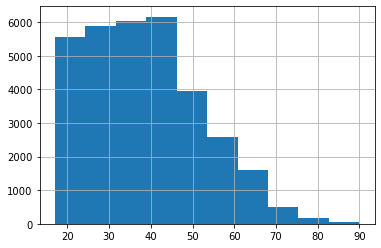

In [12]:
%matplotlib inline
base.age.hist()

In [13]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [14]:
idade = tf.feature_column.numeric_column('age')

In [15]:
idade_categorica = [tf.feature_column.bucketized_column(idade, boundaries=[20,30,40,50,60,70,80,90])]

In [16]:
print(idade_categorica)

[BucketizedColumn(source_column=NumericColumn(key='age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), boundaries=(20, 30, 40, 50, 60, 70, 80, 90))]


In [17]:
X.columns

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country'],
      dtype='object')

In [18]:
nome_colunas_categoricas = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex',
                           'native-country']

In [19]:
X['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [20]:
X['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [21]:
X['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [22]:
colunas_categoricas = [tf.feature_column.categorical_column_with_vocabulary_list(key = c, vocabulary_list=X[c].unique()) for c in nome_colunas_categoricas]

In [23]:
print(colunas_categoricas[3])

VocabularyListCategoricalColumn(key='occupation', vocabulary_list=(' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair', ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct', ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces', ' Priv-house-serv'), dtype=tf.string, default_value=-1, num_oov_buckets=0)


In [24]:
nome_colunas_numericas = ['final-weight', 'education-num', 'capital-gain', 'capital-loos', 'hour-per-week']

In [25]:
colunas_numericas = [ tf.feature_column.numeric_column(key = c) for c in nome_colunas_numericas ]

In [26]:
print(colunas_numericas[1])

NumericColumn(key='education-num', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)


In [27]:
colunas = idade_categorica + colunas_categoricas + colunas_numericas

In [28]:
colunas

[BucketizedColumn(source_column=NumericColumn(key='age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), boundaries=(20, 30, 40, 50, 60, 70, 80, 90)),
 VocabularyListCategoricalColumn(key='workclass', vocabulary_list=(' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov', ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay', ' Never-worked'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='education', vocabulary_list=(' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th', ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th', ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th', ' Preschool', ' 12th'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='marital-status', vocabulary_list=(' Never-married', ' Married-civ-spouse', ' Divorced', ' Married-spouse-absent', ' Separated', ' Married-AF-spouse', ' Widowed'), dtype=tf.string, default_value=-1, num_oov_buck

In [29]:
from sklearn.model_selection import train_test_split
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size = 0.3)

In [30]:
X_treinamento.shape

(22792, 14)

In [31]:
X_teste.shape

(9769, 14)

In [32]:
funcao_treinamento = tf.estimator.inputs.pandas_input_fn(x = X_treinamento, y = y_treinamento,
                                                        batch_size = 32, num_epochs = None, shuffle = True)

In [33]:
classificador = tf.estimator.LinearClassifier(feature_columns=colunas)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\fabio\\AppData\\Local\\Temp\\tmpckvznwuz', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [34]:
classificador.train(input_fn=funcao_treinamento, steps = 10000)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Please use `layer.add_weight` method instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\fabio\AppData\Local\Temp\tmpckvznwuz\model.ckpt.
INFO:tensorflow:Calling checkp

INFO:tensorflow:global_step/sec: 496.354
INFO:tensorflow:loss = 1978.0139, step = 5801 (0.201 sec)
INFO:tensorflow:global_step/sec: 365.482
INFO:tensorflow:loss = 193.15134, step = 5901 (0.277 sec)
INFO:tensorflow:global_step/sec: 464.718
INFO:tensorflow:loss = 5134.185, step = 6001 (0.213 sec)
INFO:tensorflow:global_step/sec: 496.789
INFO:tensorflow:loss = 1416.486, step = 6101 (0.204 sec)
INFO:tensorflow:global_step/sec: 532.806
INFO:tensorflow:loss = 792.0387, step = 6201 (0.184 sec)
INFO:tensorflow:global_step/sec: 524.526
INFO:tensorflow:loss = 234.94507, step = 6301 (0.192 sec)
INFO:tensorflow:global_step/sec: 485.745
INFO:tensorflow:loss = 5658.4834, step = 6401 (0.207 sec)
INFO:tensorflow:global_step/sec: 482.578
INFO:tensorflow:loss = 168.8042, step = 6501 (0.207 sec)
INFO:tensorflow:global_step/sec: 521.921
INFO:tensorflow:loss = 441.73975, step = 6601 (0.192 sec)
INFO:tensorflow:global_step/sec: 517.83
INFO:tensorflow:loss = 1440.5406, step = 6701 (0.191 sec)
INFO:tensorflow

In [ ]:
funcao_previsao = tf.estimator.inputs.pandas_input_fn(x = X_teste, batch_size = 32, shuffle = False)

In [ ]:
previsoes = classificador.predict(input_fn=funcao_previsao)

In [ ]:
list(previsoes)

In [ ]:
previsoes_final = []
for p in classificador.predict(input_fn=funcao_previsao):
    previsoes_final.append(p['class_ids'])

In [ ]:
previsoes_final

In [ ]:
from sklearn.metrics import accuracy_score
taxa_acerto = accuracy_score(y_teste, previsoes_final)
taxa_acerto